In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model

In [10]:
# تحديد المسار الصحيح للبيانات
data_path = r"C:\Users\m\Desktop\project Mindest\archive\chest_xray"


In [11]:
# تحميل البيانات
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    f'{data_path}/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    f'{data_path}/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [14]:
# بناء النموذج
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),  # تحديد الإدخال هنا
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# تدريب النموذج
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

C:\Users\m\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 759ms/step - accuracy: 0.8423 - loss: 0.4159 - val_accuracy: 0.9501 - val_loss: 0.1407
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 670ms/step - accuracy: 0.9624 - loss: 0.1118 - val_accuracy: 0.9406 - val_loss: 0.1475
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 85s 645ms/step - accuracy: 0.9728 - loss: 0.0816 - val_accuracy: 0.9616 - val_loss: 0.1160
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 85s 649ms/step - accuracy: 0.9834 - loss: 0.0486 - val_accuracy: 0.9636 - val_loss: 0.1138
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 93s 709ms/step - accuracy: 0.9844 - loss: 0.0468 - val_accuracy: 0.9569 - val_loss: 0.1316
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 121s 923ms/step - accuracy: 0.9859 - loss: 0.0357 - val_accuracy: 0.9425 - val_loss: 0.1676
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 85s 650ms/step - accuracy: 0.9891 - loss: 0.0300 - val_accuracy: 0.9703 - val_loss: 0.1145
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 86s 655ms/step - accuracy: 0.9950 - loss:

In [18]:
# حفظ النموذج
model.save("pneumonia_detection_model.h5")


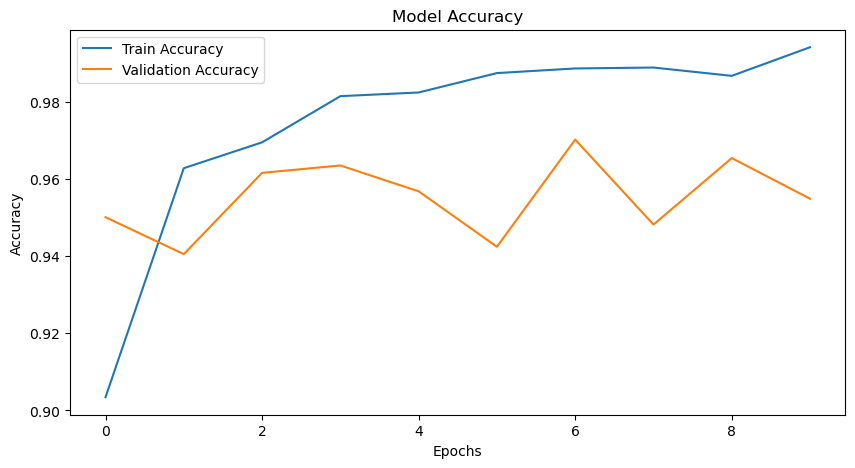

In [19]:
# رسم دقة التدريب والاختبار
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

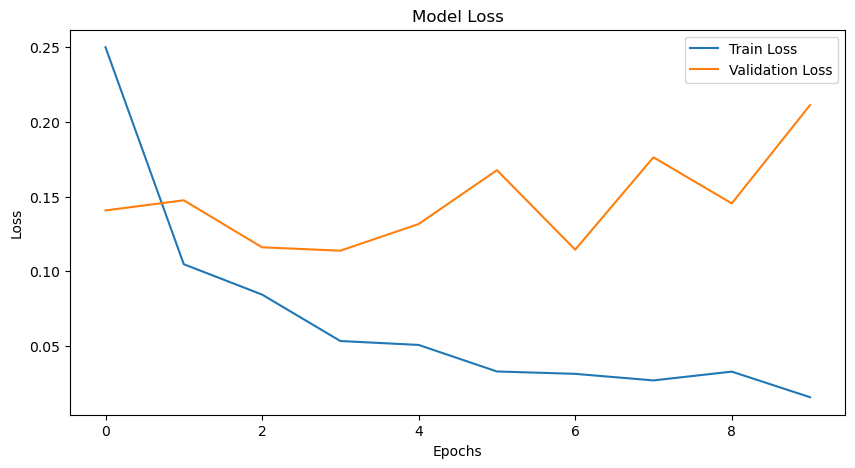

In [20]:
# رسم الخسارة
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [21]:
# تحميل النموذج المحفوظ
model = load_model("pneumonia_detection_model.h5")


In [22]:
# اختبار النموذج على صورة جديدة
def predict_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = int(prediction[0][0] > 0.5)  # تحويل القيمة إلى 0 أو 1
    print(f"Prediction: {'Pneumonia' if predicted_class == 1 else 'Normal'}")
    plt.imshow(img)
    plt.title(f"Prediction: {'Pneumonia' if predicted_class == 1 else 'Normal'}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Prediction: Normal


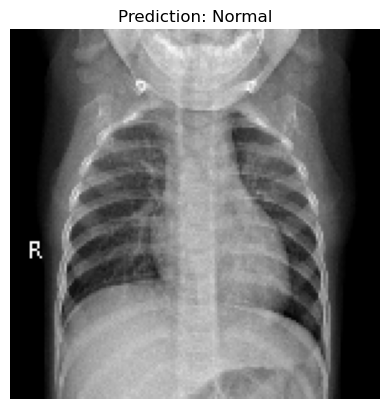

In [24]:
# تجربة على صورة اختبارية
predict_image("C:/Users/m/Desktop/project Mindest/IM-0151-0001.jpeg")